-----------------Running: relu----------------------
Epoch: 1  Training Loss: 2.0213548226730773  Time (sec): 5.280536890029907
Epoch: 2  Training Loss: 1.7417618275027205  Time (sec): 5.264867067337036
Epoch: 3  Training Loss: 1.6460485921150845  Time (sec): 4.849761724472046
Epoch: 4  Training Loss: 1.5830144469269238  Time (sec): 4.659309148788452
Epoch: 5  Training Loss: 1.5370142075345397  Time (sec): 4.43663215637207
Epoch: 6  Training Loss: 1.4950320603849714  Time (sec): 4.622883081436157
Epoch: 7  Training Loss: 1.4608180390660779  Time (sec): 4.488368034362793
Epoch: 8  Training Loss: 1.428563600915151  Time (sec): 4.976355075836182
Epoch: 9  Training Loss: 1.4030879982077538  Time (sec): 5.852772235870361
Epoch: 10  Training Loss: 1.376372468124101  Time (sec): 5.086483955383301
Epoch: 11  Training Loss: 1.3553498256505825  Time (sec): 5.130845069885254
Epoch: 12  Training Loss: 1.3376563235115957  Time (sec): 4.959640026092529
Epoch: 13  Training Loss: 1.319794877310683  Ti

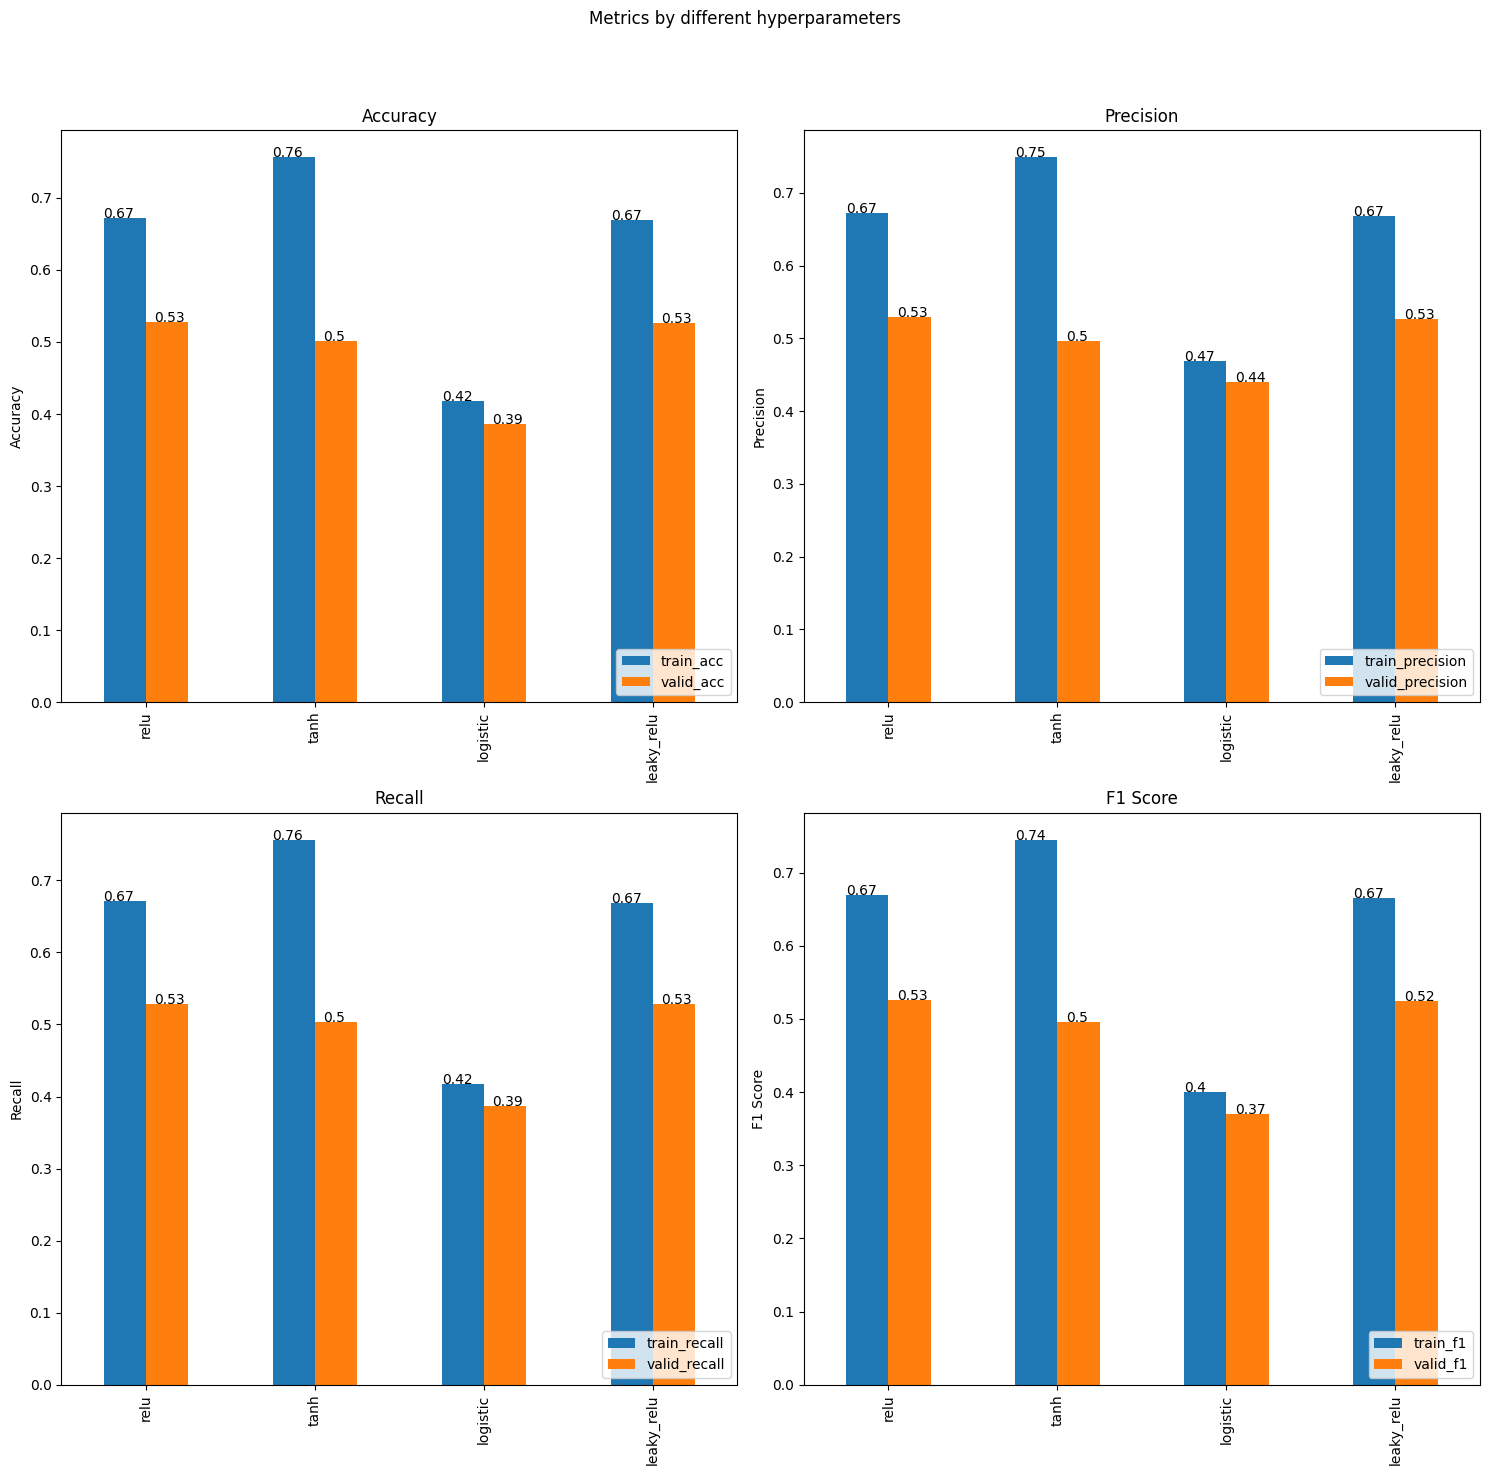

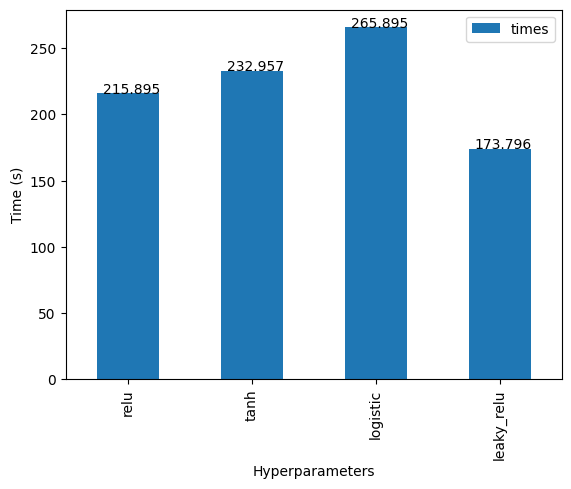

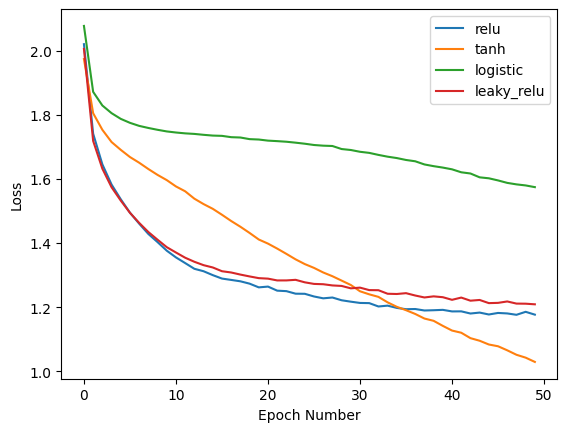

In [2]:
from algorithms import Evals

# Setup activation experiment
activaitons = ['relu', 'tanh', 'logistic', 'leaky_relu']

eval_dict = Evals.set_exp(exps= activaitons, exp_name= 'activation')
eval_df = Evals.run_exp(exp_dict= eval_dict, epochs= 50)

In [3]:
eval_df

,Hyperparameters,loss,train_acc,valid_acc,train_precision,valid_precision,train_recall,valid_recall,train_f1,valid_f1,times
0,relu,"[2.0162586130926186, 1.726677972300124, 1.6416...",0.668000,0.5334,0.664107,0.524921,0.667990,0.534025,0.661009,0.525094,207.402010
1,tanh,"[1.991401948167779, 1.8149233855254445, 1.7591...",0.739533,0.5128,0.734939,0.506266,0.739773,0.511600,0.725606,0.502915,245.488549
2,logistic,"[2.0657392820311933, 1.871231705626404, 1.8335...",0.498289,0.4646,0.491192,0.454622,0.498172,0.466115,0.483669,0.449905,219.422048
3,leaky_relu,"[2.01759183761768, 1.7333938915282443, 1.64145...",0.681689,0.5408,0.677610,0.534730,0.681710,0.541002,0.676756,0.534267,171.900650


-----------------Running: relu----------------------
Epoch: 1  Training Loss: 2.5564928706623493  Time (sec): 0.9826488494873047
Epoch: 2  Training Loss: 2.349519598397784  Time (sec): 1.0593721866607666
Epoch: 3  Training Loss: 2.2399210051051024  Time (sec): 1.0462791919708252
Epoch: 4  Training Loss: 2.1758912867346436  Time (sec): 1.153244972229004
Epoch: 5  Training Loss: 2.1243291992693147  Time (sec): 1.0427219867706299
Epoch: 6  Training Loss: 2.084243290541841  Time (sec): 1.1662070751190186
Epoch: 7  Training Loss: 2.0505278186353233  Time (sec): 1.0033679008483887
Epoch: 8  Training Loss: 2.024672690006115  Time (sec): 1.2884280681610107
Epoch: 9  Training Loss: 1.997553047905218  Time (sec): 1.0376269817352295
Epoch: 10  Training Loss: 1.9725325964373859  Time (sec): 1.2470171451568604
Epoch: 11  Training Loss: 1.9497647698239347  Time (sec): 0.9995660781860352
Epoch: 12  Training Loss: 1.9295072826587925  Time (sec): 1.0257229804992676
Epoch: 13  Training Loss: 1.908621654

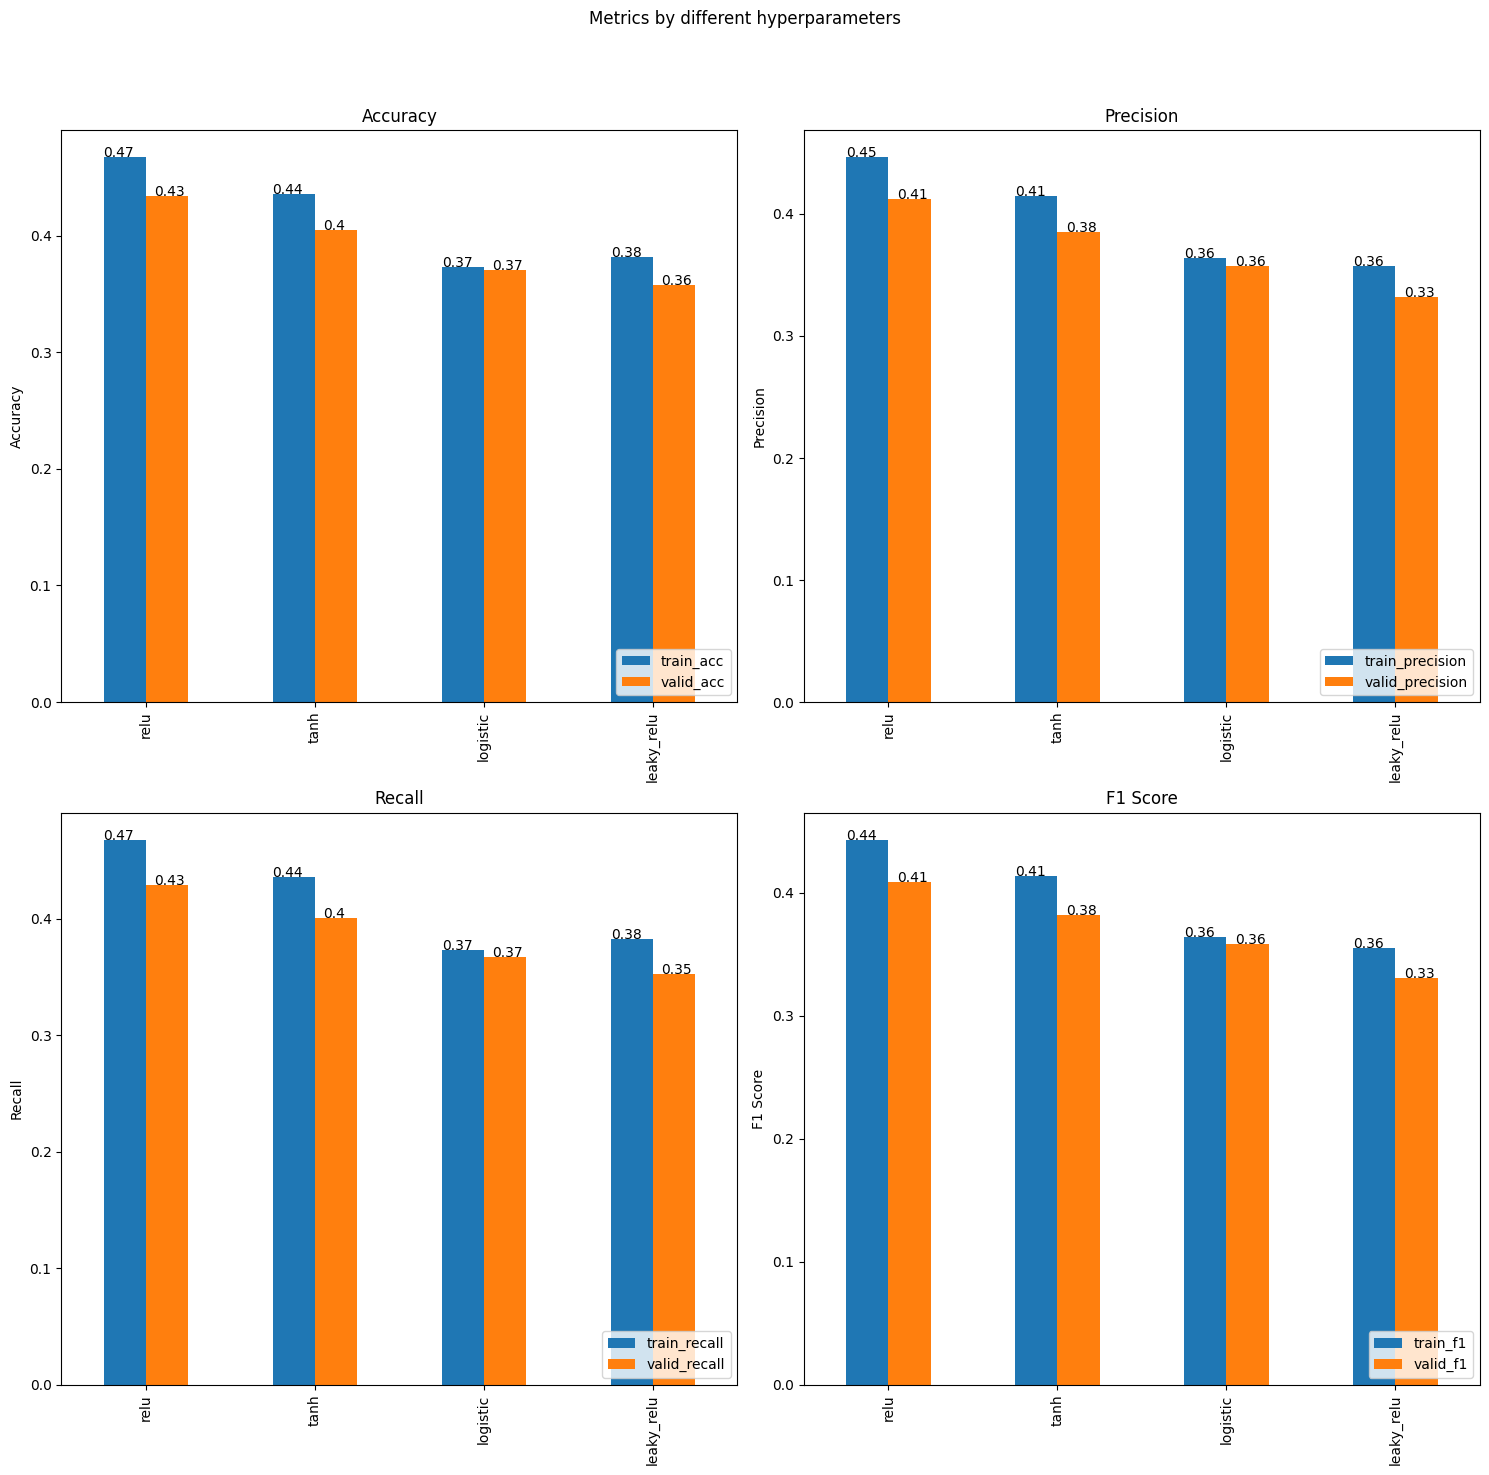

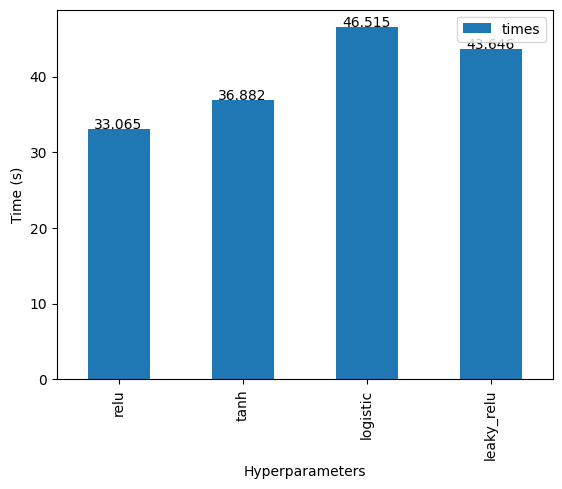

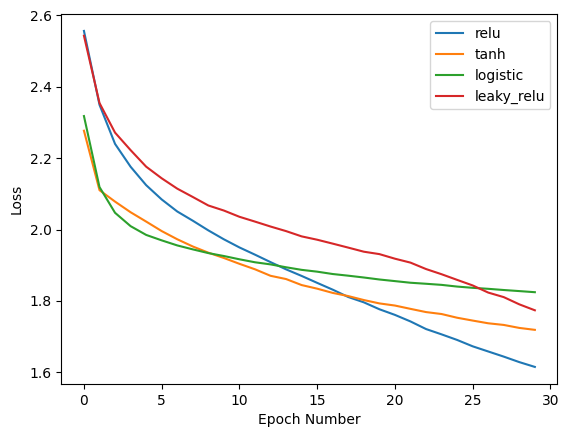

In [1]:
from algorithms import Evals

# Setup activation experiment for deep network
activaitons = ['relu', 'tanh', 'logistic', 'leaky_relu']

eval_dict = Evals.set_exp(exps= activaitons, exp_name= 'activation', deep= True)
eval_df = Evals.run_exp(exp_dict= eval_dict, epochs= 30)

-----------------Running: relu----------------------
Epoch: 1  Training Loss: 2.4857267362840796  Time (sec): 1.796180248260498
Epoch: 2  Training Loss: 2.3085562640398565  Time (sec): 1.1405630111694336
Epoch: 3  Training Loss: 2.209634519130329  Time (sec): 1.1128108501434326
Epoch: 4  Training Loss: 2.1499830336688004  Time (sec): 1.0682859420776367
Epoch: 5  Training Loss: 2.0891471640393076  Time (sec): 1.0866730213165283
Epoch: 6  Training Loss: 2.030700822220404  Time (sec): 1.1328520774841309
Epoch: 7  Training Loss: 1.997935943960088  Time (sec): 1.0473010540008545
Epoch: 8  Training Loss: 1.9654874989679765  Time (sec): 1.2558650970458984
Epoch: 9  Training Loss: 1.9321381645002467  Time (sec): 1.1770191192626953
Epoch: 10  Training Loss: 1.9084815414567518  Time (sec): 1.1250720024108887
Epoch: 11  Training Loss: 1.8878191712755443  Time (sec): 1.1174368858337402
Epoch: 12  Training Loss: 1.8731395964365654  Time (sec): 1.1494269371032715
Epoch: 13  Training Loss: 1.85718496

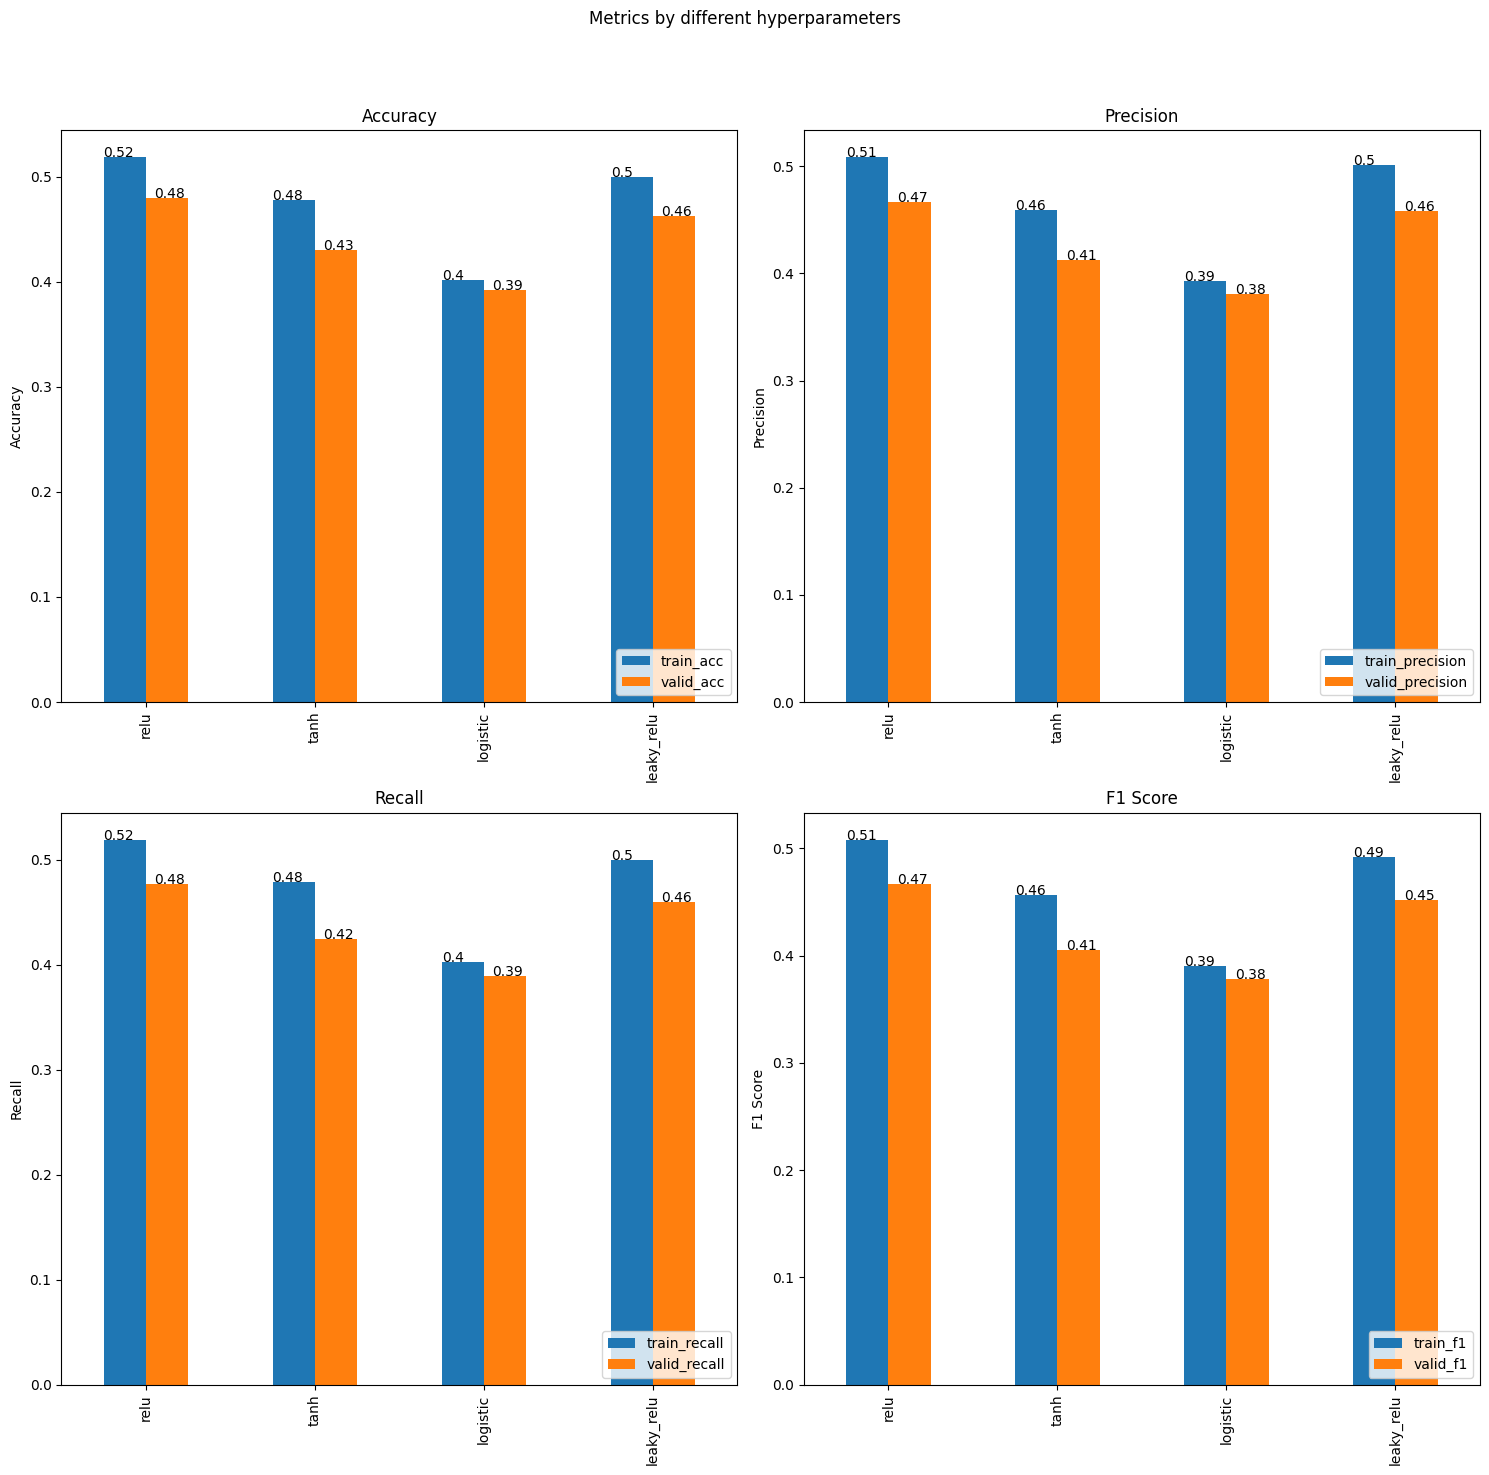

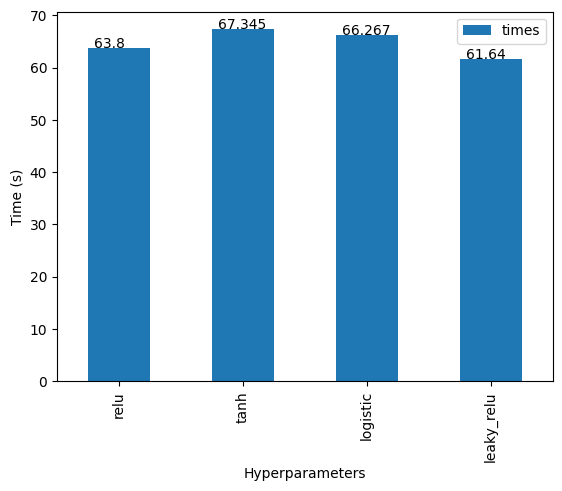

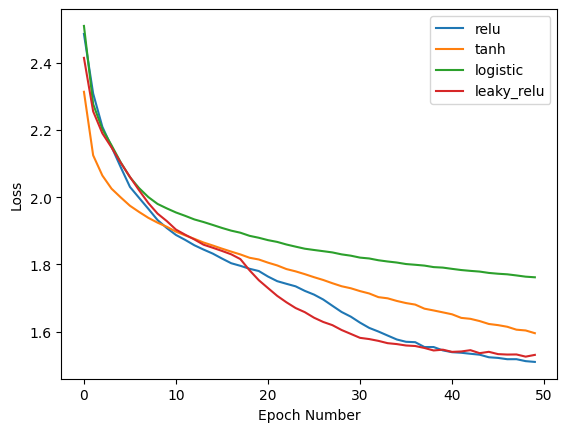

In [2]:
from algorithms import Evals

# Setup activation experiment for deep network
activaitons = ['relu', 'tanh', 'logistic', 'leaky_relu']

eval_dict = Evals.set_exp(exps= activaitons, exp_name= 'activation', deep= True)
eval_df = Evals.run_exp(exp_dict= eval_dict, epochs= 50)

-----------------Running: relu----------------------
Epoch: 1  Training Loss: 2.4676150298460593  Time (sec): 1.3043930530548096
Epoch: 2  Training Loss: 2.257680176990962  Time (sec): 1.1503629684448242
Epoch: 3  Training Loss: 2.1625587990170243  Time (sec): 1.0930709838867188
Epoch: 4  Training Loss: 2.106045558861528  Time (sec): 1.7051851749420166
Epoch: 5  Training Loss: 2.069374448446756  Time (sec): 1.4989213943481445
Epoch: 6  Training Loss: 2.040953612307626  Time (sec): 1.5187890529632568
Epoch: 7  Training Loss: 2.022899439716379  Time (sec): 1.7257781028747559
Epoch: 8  Training Loss: 2.0052176471204954  Time (sec): 1.185934066772461
Epoch: 9  Training Loss: 1.9891326113488297  Time (sec): 1.0747897624969482
Epoch: 10  Training Loss: 1.976278527496338  Time (sec): 1.119568109512329
Epoch: 11  Training Loss: 1.9619756520576628  Time (sec): 1.0687239170074463
Epoch: 12  Training Loss: 1.9491021116668288  Time (sec): 1.1566119194030762
Epoch: 13  Training Loss: 1.939279592771

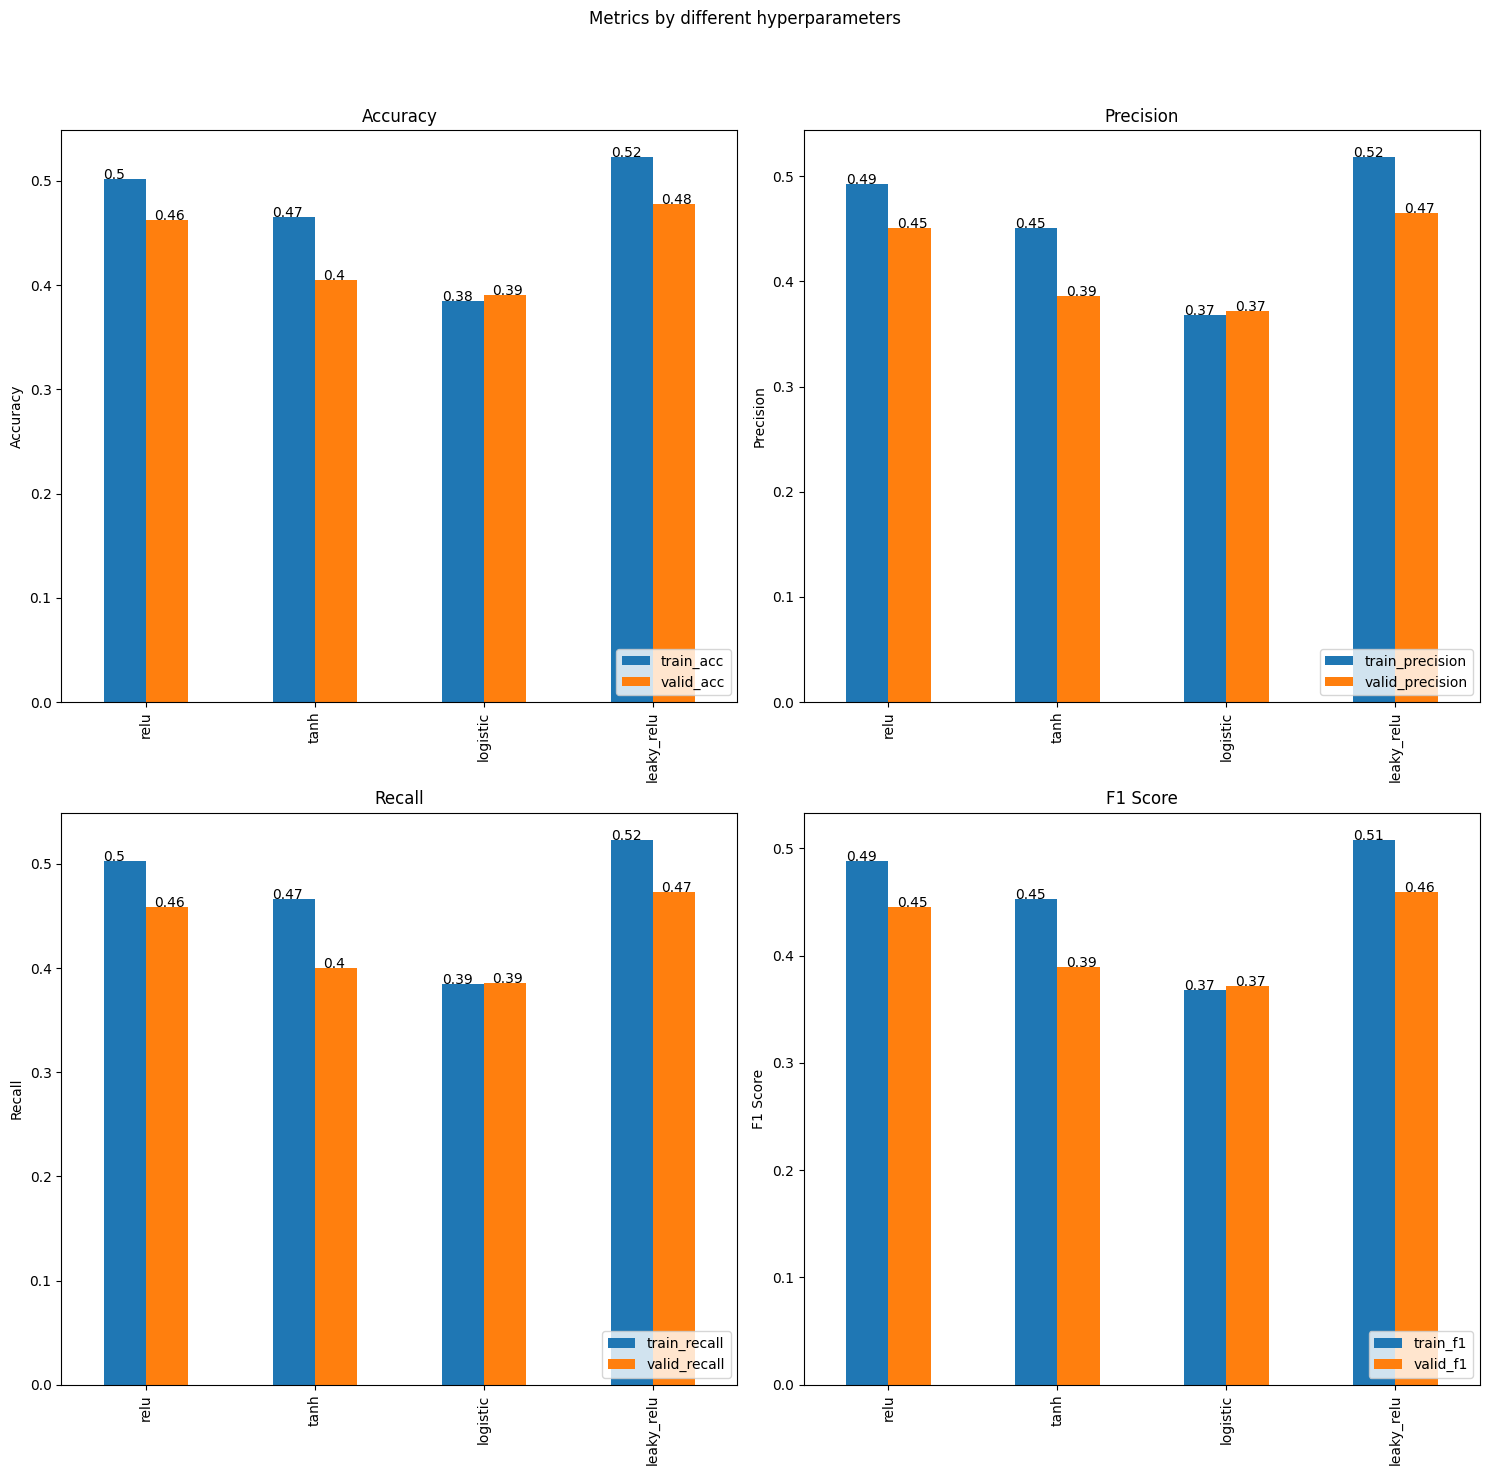

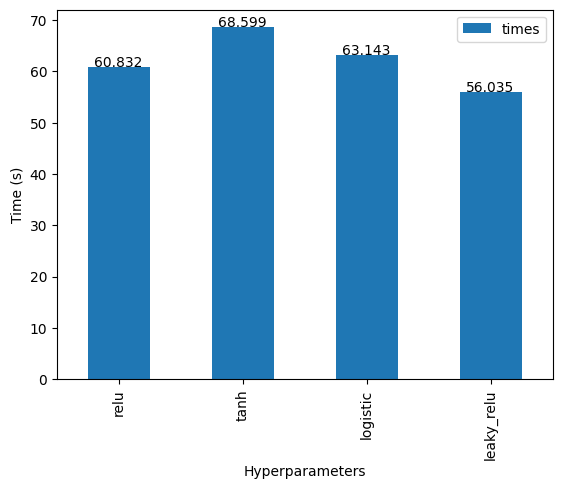

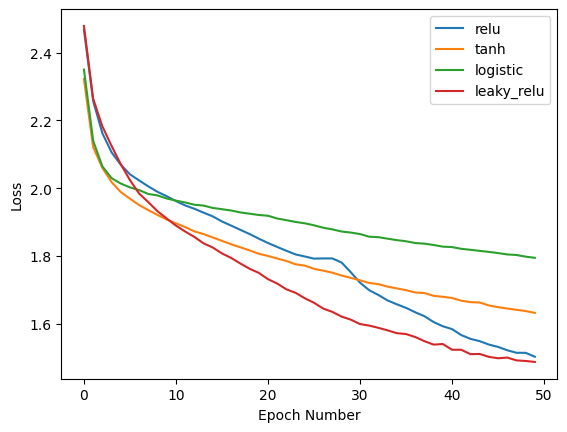

In [3]:
from algorithms import Evals

# Setup activation experiment for deep network
activaitons = ['relu', 'tanh', 'logistic', 'leaky_relu']

eval_dict = Evals.set_exp(exps= activaitons, exp_name= 'activation', deep= True)
eval_df = Evals.run_exp(exp_dict= eval_dict, epochs= 50)

-----------------Running: True----------------------
Epoch: 1  Training Loss: 2.3627451063129397  Time (sec): 37.1255669593811
Epoch: 2  Training Loss: 1.9180715000921362  Time (sec): 6.195574045181274
-----------------Running: False----------------------
Epoch: 1  Training Loss: 2.292528892198333  Time (sec): 3.8970699310302734
Epoch: 2  Training Loss: 2.219785124267599  Time (sec): 3.0164411067962646


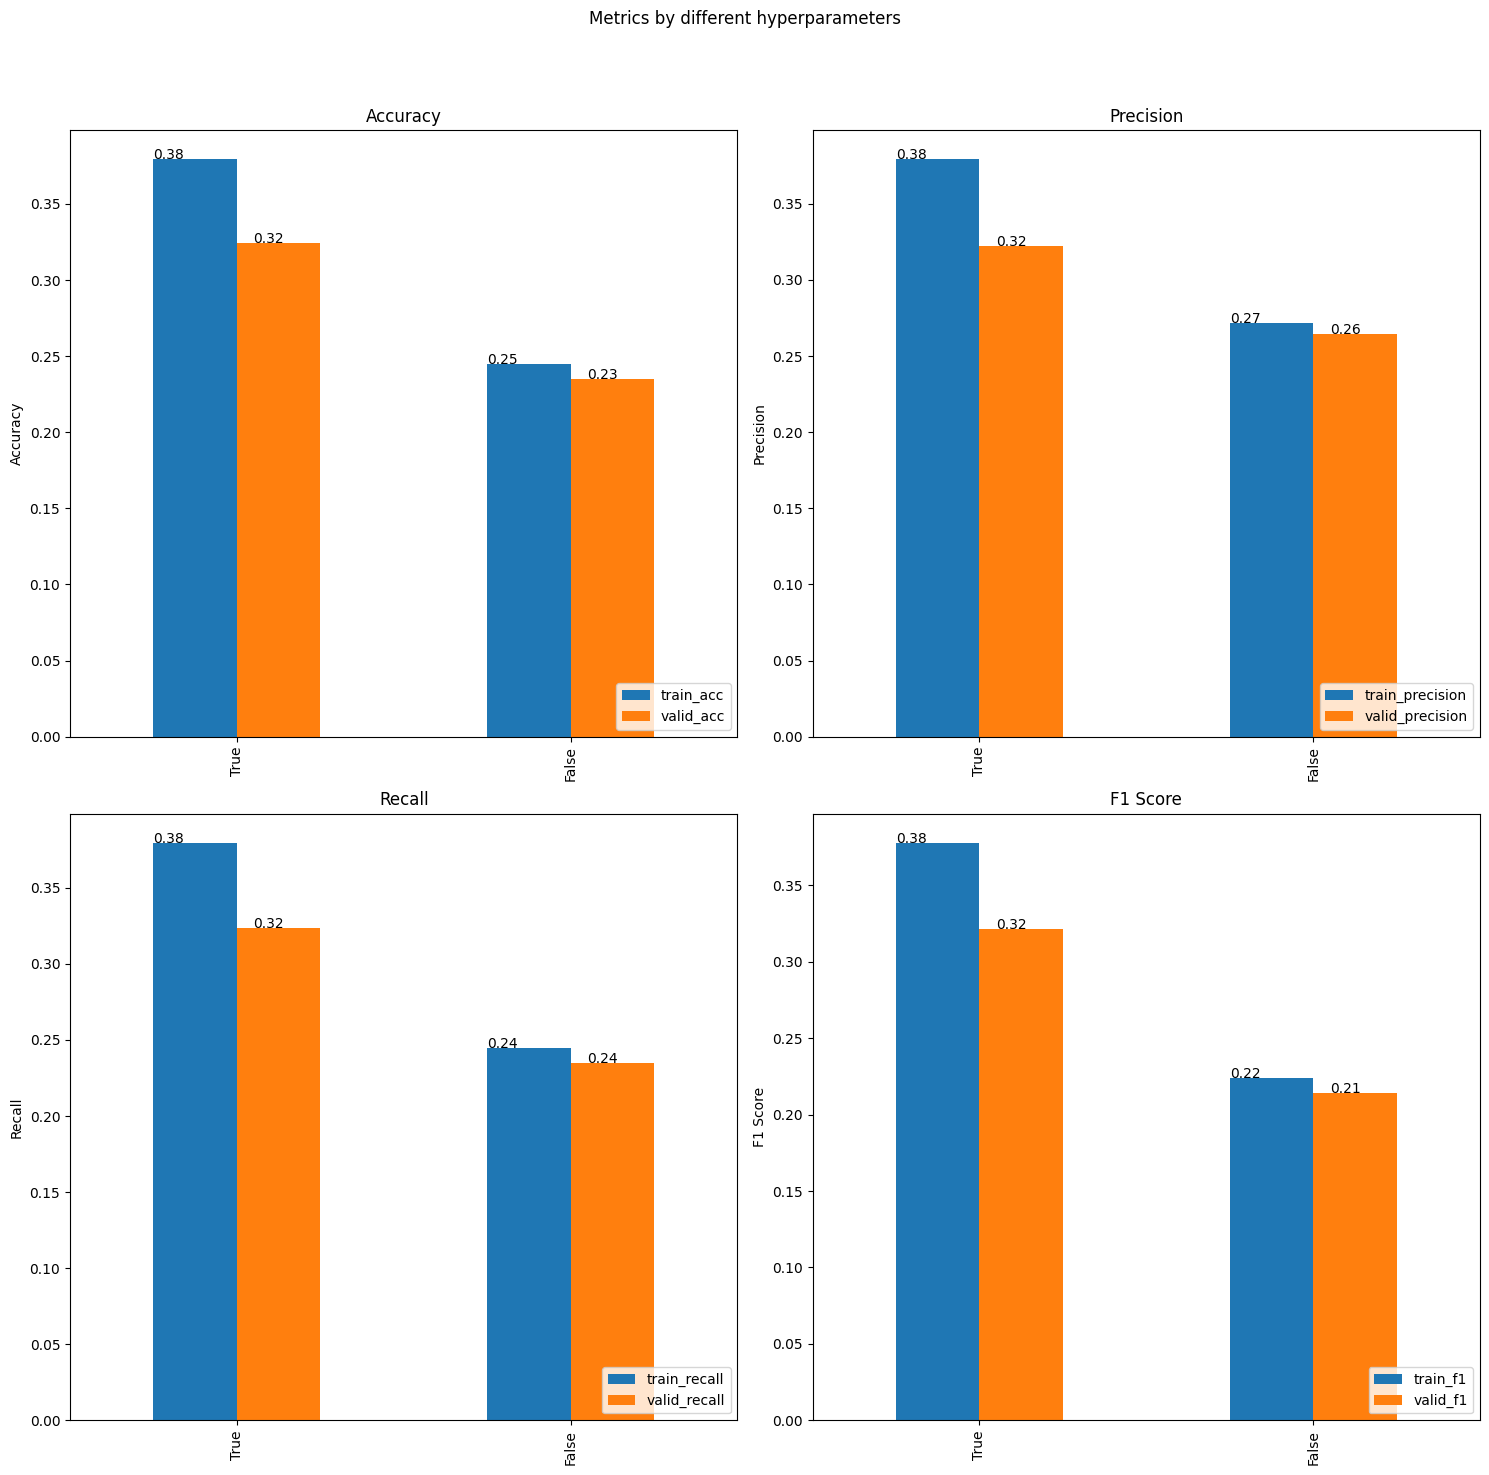

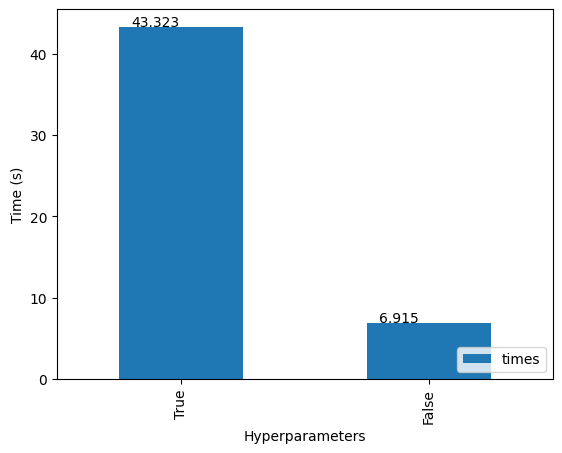

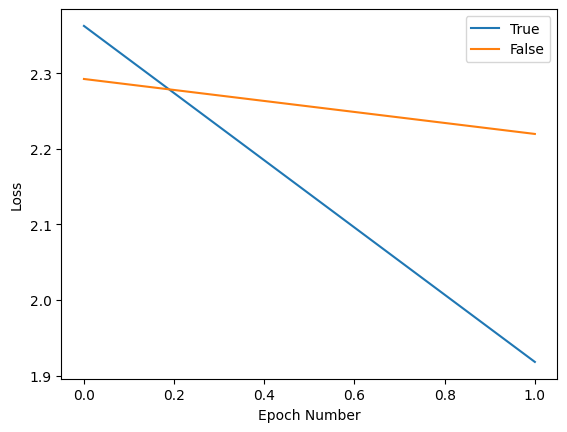

In [1]:
from algorithms import Evals

# Setup activation experiment
bn = [True, False]

eval_dict = Evals.set_exp(exps= bn, exp_name= 'batch_normalizer')
eval_df = Evals.run_exp(exp_dict= eval_dict, epochs= 2)